In [58]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

from plotly.subplots import make_subplots

import plotly.express as px

from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report, confusion_matrix

In [59]:
df= pd.read_csv('Epileptic Seizure Recognition.csv')
df.drop('Unnamed', axis=1, inplace=True)
# mapping name of coloumn to be understanding in visualization

class_labels = {

    5: 'eyes open',

    4: 'eyes closed',

    3: 'tumor region identified',

    2: 'EEG from tumor area',

    1: 'seizure activity'

}

df['y'] = df['y'].map(class_labels)

df['y'].head()



0         eyes closed
1    seizure activity
2           eyes open
3           eyes open
4           eyes open
Name: y, dtype: object

In [60]:
df['y'].value_counts()

y
eyes closed                2300
seizure activity           2300
eyes open                  2300
EEG from tumor area        2300
tumor region identified    2300
Name: count, dtype: int64

In [61]:
# convert target column from object data type to numerical data type

dic = {'seizure activity': 1,

       'eyes open': 0 ,

       'eyes closed': 0,

       'tumor region identified': 0,

       'EEG from tumor area': 0}



df['y'] = df['y'].map(dic)

print(df['y'].value_counts())

df.head()

y
0    9200
1    2300
Name: count, dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


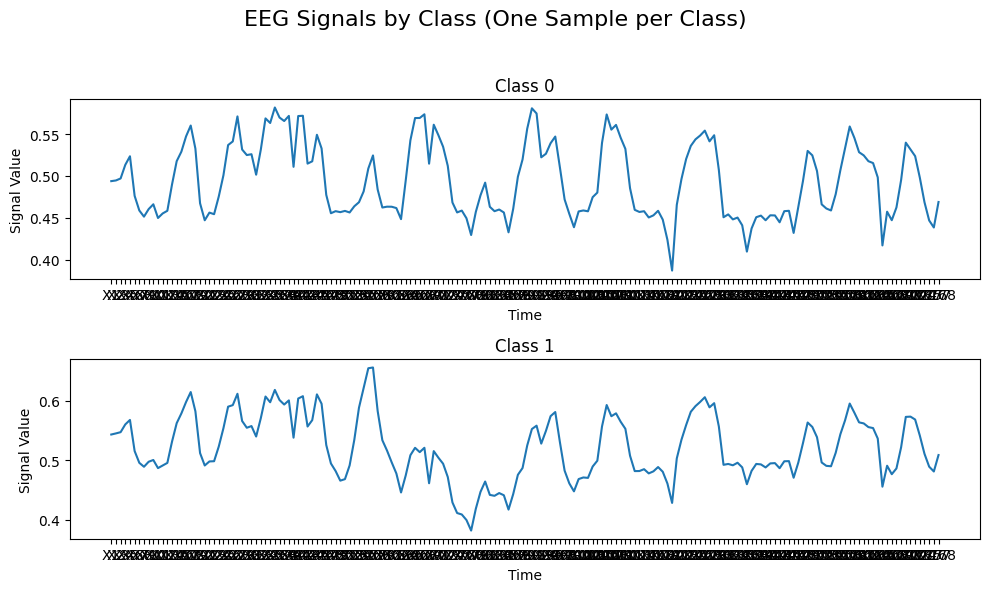

In [ ]:
import matplotlib.pyplot as plt

# Get unique classes
unique_classes = df['y'].unique()

# Create subplots for each class with 1 column (1 sample per class)
fig, axes = plt.subplots(nrows=len(unique_classes), ncols=1, figsize=(10, 3 * len(unique_classes)))
fig.suptitle('EEG Signals by Class (One Sample per Class)', fontsize=16)

# Iterate over each class
for i, class_label in enumerate(unique_classes):
    class_data = df[df['y'] == class_label]
    
    # Select 1 random sample from the class
    random_sample = class_data.sample(n=1).drop(columns='y')  # Exclude the 'y' column
    
    # Plot the sample
    axes[i].plot(random_sample.iloc[0, :])  # Now it plots only the numeric data
    axes[i].set_title(f'Class {class_label}', fontsize=12)
    axes[i].set_ylabel('Signal Value')
    axes[i].set_xlabel('Time')

# Adjust layout for a clean look
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title

# Show the plot
plt.show()


In [62]:
import pandas as pd

# Assuming your DataFrame is named `df` and the label column is named 'y'
label_col = 'y'

# Separate the label column from the features
labels = df[label_col]    
features = df.drop(columns=[label_col])

# Normalize the feature columns to be in the range [0, 1]
features_normalized = (features - features.min()) / (features.max() - features.min())

# Combine the normalized features with the label column
df = pd.concat([features_normalized, labels], axis=1)
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,0.553717,0.571107,0.584371,0.598207,0.599275,0.526728,0.486466,0.462484,0.464883,0.467297,...,0.507684,0.554390,0.544073,0.521051,0.489858,0.454331,0.434953,0.435612,0.474893,0
1,0.624123,0.625176,0.620328,0.629447,0.637957,0.579905,0.551431,0.535948,0.536146,0.536280,...,0.557355,0.603836,0.603850,0.593542,0.562101,0.528396,0.505486,0.495495,0.522970,1
2,0.506872,0.506618,0.506229,0.522997,0.531581,0.481668,0.457592,0.445752,0.451505,0.452989,...,0.527991,0.578064,0.570753,0.551440,0.515143,0.479717,0.456113,0.448331,0.478900,0
3,0.486396,0.489158,0.492356,0.507087,0.514355,0.465155,0.445991,0.438693,0.450990,0.456822,...,0.489846,0.534612,0.527524,0.521051,0.494860,0.467417,0.446447,0.439322,0.471154,0
4,0.513324,0.499296,0.491789,0.504194,0.517679,0.478310,0.468162,0.464837,0.467970,0.461932,...,0.513447,0.559485,0.550490,0.535296,0.507085,0.470557,0.443574,0.434022,0.469017,0


X1      0.0
X2      0.0
X3      0.0
X4      0.0
X5      0.0
       ... 
X175    0.0
X176    0.0
X177    0.0
X178    0.0
y       0.0
Length: 179, dtype: float64

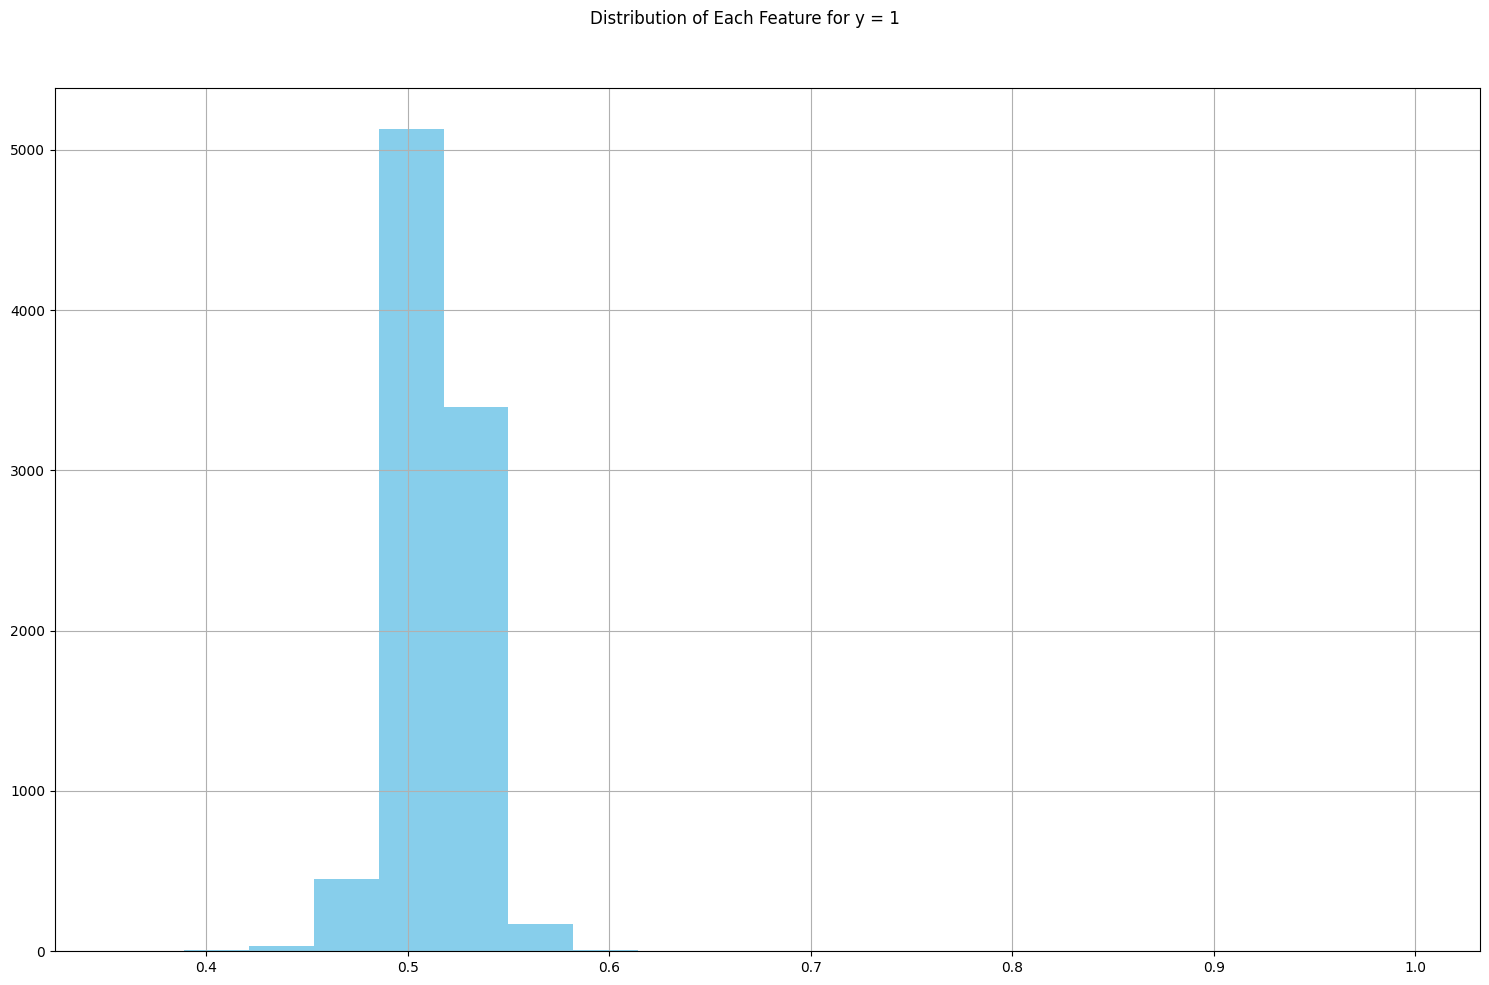

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame where 'y' equals 1
filtered_df = df[df['y'] == 0]

# Plot histograms for each feature in filtered_df (excluding the 'y' column)
filtered_df['X1'].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Each Feature for y = 1")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.show()


In [63]:
df1= df.copy()

df2= df.copy()

# Separate features and labels

X = df1.drop('y', axis=1).values  # Drop the label column 'y'

y = df1['y'].values



# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class LSTMModel(nn.Module):
    def __init__(self, input_size):
        super(LSTMModel, self).__init__()
        
        # LSTM layers
        self.lstm1 = nn.LSTM(input_size, 128, batch_first=True)
        self.bn1 = nn.BatchNorm1d(128)  # Apply BatchNorm on hidden size
        self.dropout1 = nn.Dropout(0.2)
        
        self.lstm2 = nn.LSTM(128, 64, batch_first=True)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.3)
        
        self.lstm3 = nn.LSTM(64, 32, batch_first=True)
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.2)
        
        # Fully connected output layer
        self.fc = nn.Linear(32, 1)  # Output size 1 for binary classification

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.bn1(x.transpose(1, 2)).transpose(1, 2)  # Apply BatchNorm on hidden features, then transpose back
        x = self.dropout1(x)
        
        x, _ = self.lstm2(x)
        x = self.bn2(x.transpose(1, 2)).transpose(1, 2)
        x = self.dropout2(x)
        
        x, _ = self.lstm3(x)
        x = self.bn3(x.transpose(1, 2)).transpose(1, 2)
        x = self.dropout3(x)
        
        x = x[:, -1, :]  # Take the output from the last timestep
        x = self.fc(x)
        return torch.sigmoid(x).squeeze()

In [65]:
input_size = 1              # One feature per time step (EEG value)
hidden_size = 256           # Increase hidden size for more capacity
num_layers = 5              # Increase the number of LSTM layers
num_classes = 1             # Binary classification (single sigmoid output)
dropout_rate = 0.5          # Dropout rate for regularization
learning_rate = 0.001
num_epochs = 100
batch_size = 32
clip_value = 1.0 
# Convert your dataset to PyTorch tensors
# Assuming your data is loaded as `X_data` (shape: [num_samples, 178]) and `y_data` (shape: [num_samples])
X_data = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # shape: [num_samples, 178, 1]

# print(X_data.shape)
y_data = torch.tensor(y_train, dtype=torch.long)                   # shape: [num_samples]
# print(y_data.shape)

# Create data loaders
dataset = TensorDataset(X_data, y_data)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)



X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)  # shape: [num_samples, 178, 1]
y_test = torch.tensor(y_test, dtype=torch.long)                   # shape: [num_samples]

# Create data loaders
test_set = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)


train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, drop_last=True)


# Instantiate model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size=input_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
model.train()
best_val_loss = float('inf') 
for epoch in range(num_epochs):
    for i, (eeg_data, labels) in enumerate(train_loader):
        # print(eeg_data.shape)
        eeg_data = eeg_data.to(device)
        # labels = labels.to(device)
        labels = labels.to(device).float()
        # Forward pass
        outputs = model(eeg_data)

        # print(outputs, labels)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for eeg_data, labels in test_loader:
            eeg_data = eeg_data.to(device)
            labels = labels.to(device).float()

            # Forward pass
            outputs = model(eeg_data)

            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy
            predicted = (outputs >= 0.5).float()  # Convert probabilities to 0 or 1
            
            # Calculate accuracy
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = val_loss / len(test_loader)
    val_accuracy = 100 * correct / total
    print(f'Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%\n')
    if avg_val_loss<=best_val_loss:
        torch.save(model.state_dict(), 'eeg_lstm_model.pth')
        best_val_loss = avg_val_loss
    model.train()

Epoch [1/100], Step [10/287], Loss: 0.1871
Epoch [1/100], Step [20/287], Loss: 0.4016
Epoch [1/100], Step [30/287], Loss: 0.4356
Epoch [1/100], Step [40/287], Loss: 0.2913
Epoch [1/100], Step [50/287], Loss: 0.0892
Epoch [1/100], Step [60/287], Loss: 0.1579
Epoch [1/100], Step [70/287], Loss: 0.1640
Epoch [1/100], Step [80/287], Loss: 0.2406
Epoch [1/100], Step [90/287], Loss: 0.2083
Epoch [1/100], Step [100/287], Loss: 0.0757
Epoch [1/100], Step [110/287], Loss: 0.4429
Epoch [1/100], Step [120/287], Loss: 0.4301
Epoch [1/100], Step [130/287], Loss: 0.1328
Epoch [1/100], Step [140/287], Loss: 0.3988
Epoch [1/100], Step [150/287], Loss: 0.2383
Epoch [1/100], Step [160/287], Loss: 0.3580
Epoch [1/100], Step [170/287], Loss: 0.3128
Epoch [1/100], Step [180/287], Loss: 0.2654
Epoch [1/100], Step [190/287], Loss: 0.3808
Epoch [1/100], Step [200/287], Loss: 0.0960
Epoch [1/100], Step [210/287], Loss: 0.1980
Epoch [1/100], Step [220/287], Loss: 0.0943
Epoch [1/100], Step [230/287], Loss: 0.15

KeyboardInterrupt: 

Validation Loss: 0.0738, Accuracy: 97.23%


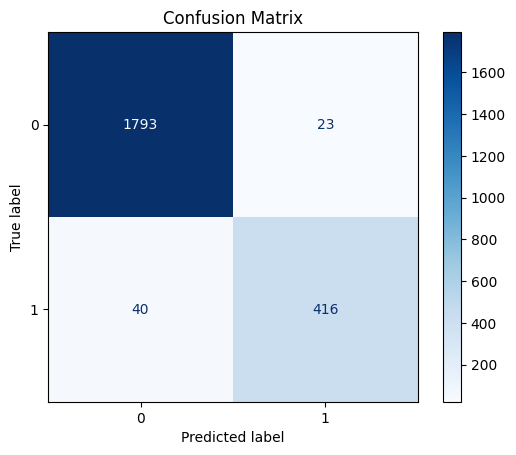

In [67]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the best model weights
model.load_state_dict(torch.load('eeg_lstm_model.pth'))
model.eval() 

# Initialize variables for evaluation
val_loss = 0.0
all_predictions = []
all_labels = []
correct = 0
total = 0

with torch.no_grad():  # No need to compute gradients during evaluation
    for inputs, labels in test_loader:
        
        outputs = model(inputs).squeeze()
        labels = labels.to(device).float()

        loss = criterion(outputs, labels)
        val_loss += loss.item()
        
        # Collect predictions and labels
        predicted = (outputs >= 0.5).float()  # Convert probabilities to 0 or 1
        all_predictions.extend(predicted.numpy())
        all_labels.extend(labels.numpy())
        
        # Calculate accuracy
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Convert lists to numpy arrays for confusion matrix
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Print final evaluation results
average_val_loss = val_loss / len(test_loader)
accuracy = 100 * correct / total
print(f"Validation Loss: {average_val_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [139]:
X_ch=pd.read_csv('smoothed_values.csv').values

(471, 1)
[[0.52      ]
 [0.52285714]
 [0.52428571]
 [0.53857143]
 [0.53428571]
 [0.53428571]
 [0.52857143]
 [0.49571429]
 [0.49285714]
 [0.48857143]
 [0.49      ]
 [0.48714286]
 [0.48571429]
 [0.48428571]
 [0.48285714]
 [0.49      ]
 [0.48714286]
 [0.48142857]
 [0.48285714]
 [0.48571429]
 [0.48714286]
 [0.48857143]
 [0.49571429]
 [0.49142857]
 [0.50428571]
 [0.52714286]
 [0.53142857]
 [0.51714286]
 [0.56142857]
 [0.57142857]
 [0.56571429]
 [0.56142857]
 [0.49857143]
 [0.49428571]
 [0.48857143]
 [0.48714286]
 [0.48428571]
 [0.49142857]
 [0.48714286]
 [0.48857143]
 [0.48857143]
 [0.48857143]
 [0.51142857]
 [0.49714286]
 [0.51285714]
 [0.53142857]
 [0.53428571]
 [0.53857143]
 [0.55571429]
 [0.55714286]
 [0.55857143]
 [0.56428571]
 [0.55571429]
 [0.53428571]
 [0.54428571]
 [0.53142857]
 [0.53571429]
 [0.52857143]
 [0.52857143]
 [0.51857143]
 [0.51857143]
 [0.53142857]
 [0.52857143]
 [0.53571429]
 [0.56142857]
 [0.56285714]
 [0.54571429]
 [0.56428571]
 [0.56714286]
 [0.56      ]
 [0.5671428

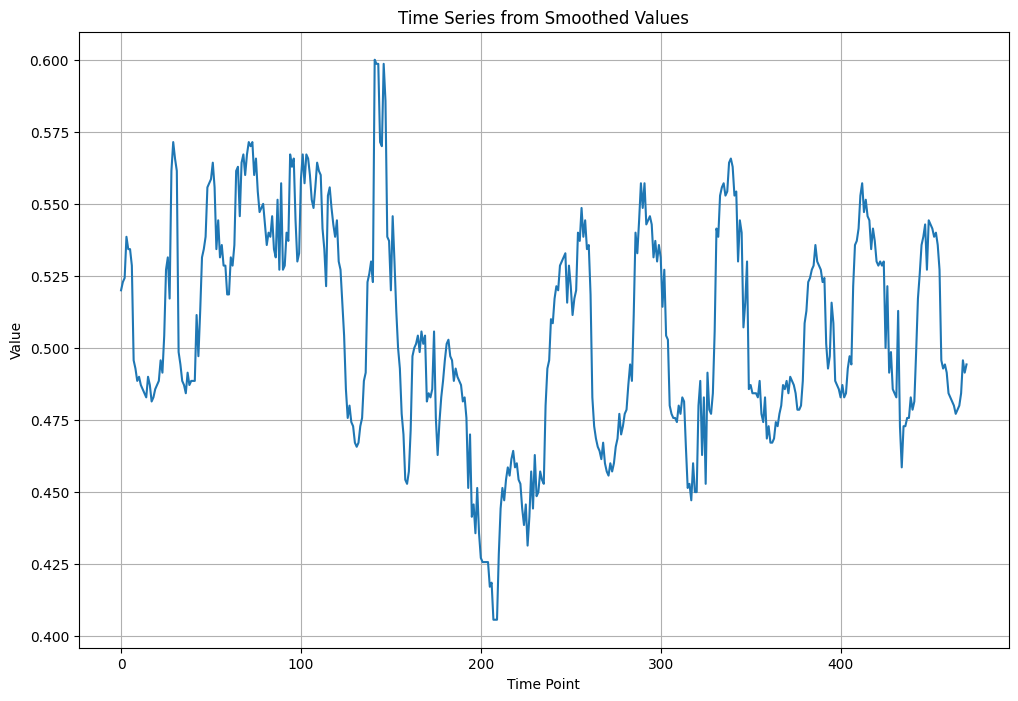

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

X_ch = pd.read_csv('smoothed_values.csv', header=None).values  # Load without headers

# Check the shape and content of X_ch
print(X_ch.shape)  # Should print (1, 178) if there's one row
print(X_ch)        # Print the values for debugging

# If it's a single row, flatten it to 1D
X_ch_flat = X_ch.flatten()  # This will convert it to a 1D array if it's originally 2D

# Plot the values directly without specifying x-values
plt.figure(figsize=(12, 8))
plt.plot(X_ch_flat)  # Plot the flattened values

plt.xlabel('Time Point')  # Add x-axis label
plt.ylabel('Value')       # Add y-axis label
plt.title('Time Series from Smoothed Values')  # Title of the plot
plt.grid()               # Add grid lines for better readability
plt.show()     

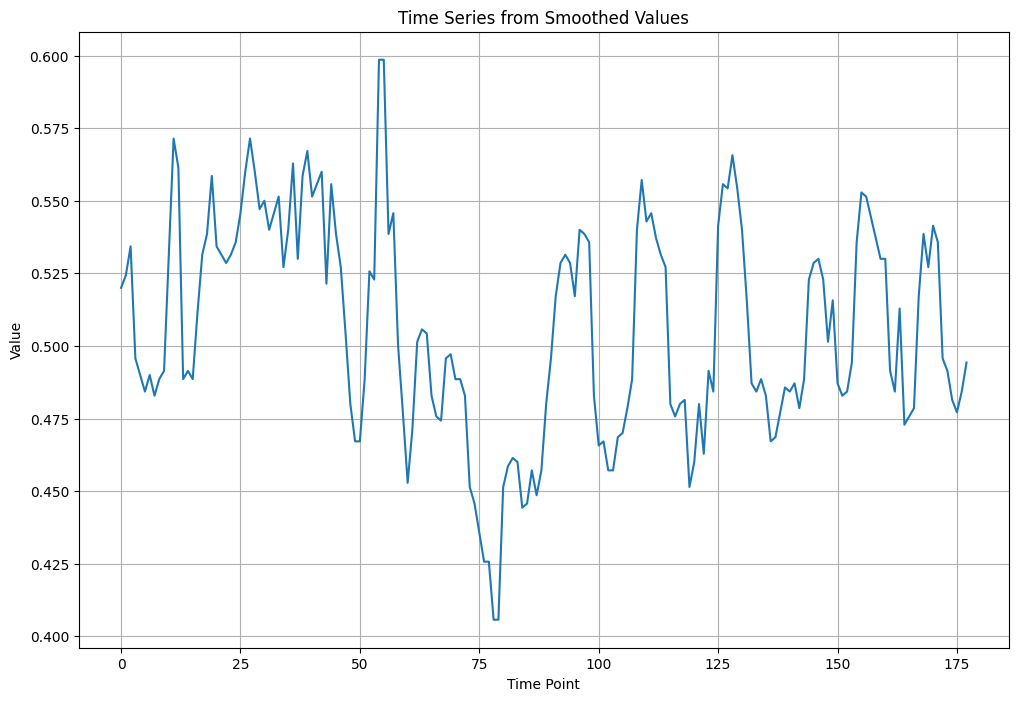

(1, 178, 1)
Predicted probability of the positive class: tensor(0.0003, grad_fn=<SqueezeBackward0>)


In [142]:

# poi=np.random.randn(5,178,1)
# print(poi.shape)
indices = np.linspace(0, len(X_ch_flat) - 1, 178, dtype=int)
# indices = np.linspace(0, len(poi) - 1, 178, dtype=int)

# print(indices)
# # Use the indices to sample from the original array
sampled_points = X_ch_flat[indices]
# sampled_points=X_ch_flat


# Plot the values directly without specifying x-values
plt.figure(figsize=(12, 8))
plt.plot(sampled_points)  # Plot the flattened values

plt.xlabel('Time Point')  # Add x-axis label
plt.ylabel('Value')       # Add y-axis label
plt.title('Time Series from Smoothed Values')  # Title of the plot
plt.grid()               # Add grid lines for better readability
plt.show()     

sampled_points = sampled_points[:, np.newaxis]

sampled_points = sampled_points[np.newaxis,:,:]


print(sampled_points.shape) 
# print(sampled_points)

# print(sampled_points.reshape(-1,1).shape)

# Reshape sampled_points to (1, 178)

# sampled_points = sampled_points.reshape(5, 178)
# sampled_points=np.random.rand(1,178)

# Pass through the model
# plt.scatter(x=range(178),y=sampled_points.reshape(178,1))  # Plot the flattened values

# plt.xlabel('Time Point')  # Add x-axis label
# plt.ylabel('Value')       # Add y-axis label
# plt.title('Time Series from Smoothed Values')  # Title of the plot
# plt.grid()               # Add grid lines for better readability
# plt.show()     


# print(poi.shape)

# poi=samples_to_plot
# sampled_points=np.random.rand((1,178))

# sampled_points=np.zeros((1,178,1))
outputs = model(torch.tensor(sampled_points, dtype=torch.float32))

print("Predicted probability of the positive class:", outputs)